# Lección 6 - Librería Matplotlib

En las lecciones anteriores utilizamos Seaborn para explorar los datos de **ComercioYA**. Ahora, utilizaremos **Matplotlib** para tomar el control total sobre la personalización y la estructura de nuestros reportes visuales. 

Matplotlib es la librería sobre la cual está construida Seaborn. Entender cómo gestionar figuras y subplots es fundamental para crear tableros (dashboards) que permitan comparar distintas métricas de negocio en una sola imagen exportable.

### 🎯 Objetivo
Crear visualizaciones personalizadas y exportables.

### 1. Crear figuras y subplots

En esta tarea, aprenderemos a utilizar la función `plt.subplots()`. Esta herramienta nos permite dividir el lienzo en una cuadrícula de filas y columnas. 

Para el equipo de **ComercioYA**, crearemos una figura que contenga dos gráficos en paralelo (1 fila y 2 columnas). Esto nos permitirá comparar de forma directa la distribución de las `compras` frente a la distribución del `monto_total` en dólares, optimizando el espacio y facilitando la lectura del reporte.

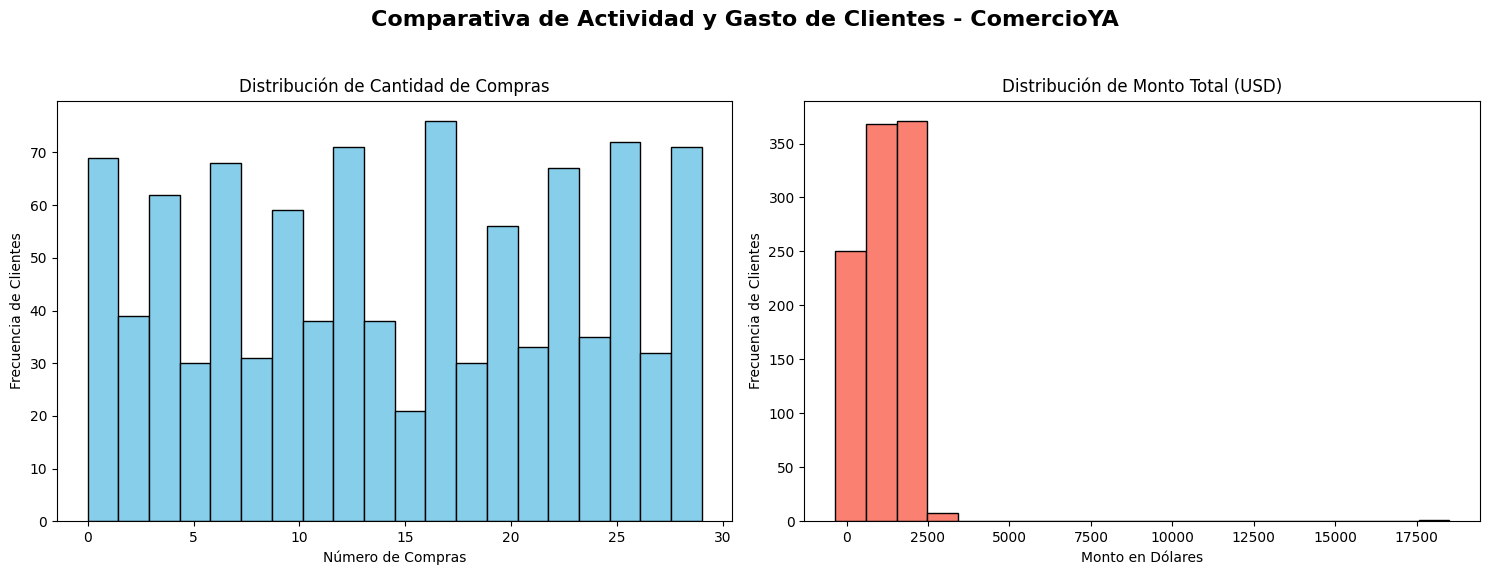

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargamos el dataset
df = pd.read_csv('comercio_ya_bruto.csv')
df_limpio = df.dropna()

# 1. Definimos la estructura de la figura (1 fila, 2 columnas)
# fig es el contenedor general, axes es una lista con cada gráfico
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# 2. Primer gráfico (Histograma de Compras)
axes[0].hist(df_limpio['compras'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Distribución de Cantidad de Compras', fontsize=12)
axes[0].set_xlabel('Número de Compras')
axes[0].set_ylabel('Frecuencia de Clientes')

# 3. Segundo gráfico (Histograma de Monto Total)
axes[1].hist(df_limpio['monto_total'], bins=20, color='salmon', edgecolor='black')
axes[1].set_title('Distribución de Monto Total (USD)', fontsize=12)
axes[1].set_xlabel('Monto en Dólares')
axes[1].set_ylabel('Frecuencia de Clientes')

# 4. Ajustes globales de la figura
plt.suptitle('Comparativa de Actividad y Gasto de Clientes - ComercioYA', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajusta márgenes para que el título no se superponga

# 5. Guardar la figura para reportes externos
plt.savefig('comparativa_actividad_comercioya.png', dpi=300)

plt.show()

### Interpretación de la Figura y Subplots

Al organizar la información mediante subplots, el análisis de **ComercioYA** se vuelve más eficiente:

* **Arquitectura de la Información:** En lugar de generar gráficos dispersos, hemos creado una sola pieza de información coherente. El gráfico de la izquierda muestra la frecuencia de transacciones, mientras que el de la derecha muestra el valor económico.
* **Control de Diseño:** Matplotlib nos permitió definir títulos individuales para cada eje y un título general para la figura, asegurando que cualquier persona que vea la imagen entienda el contexto de inmediato.
* **Exportación:** Mediante el comando `savefig`, hemos generado un archivo de alta resolución (.png) que está listo para ser insertado en una presentación de diapositivas o enviado por correo al equipo de gerencia.

**Conclusión:** El uso de subplots es la forma profesional de presentar datos correlacionados, permitiendo que el analista guíe la mirada del receptor del informe hacia los puntos de comparación más importantes.

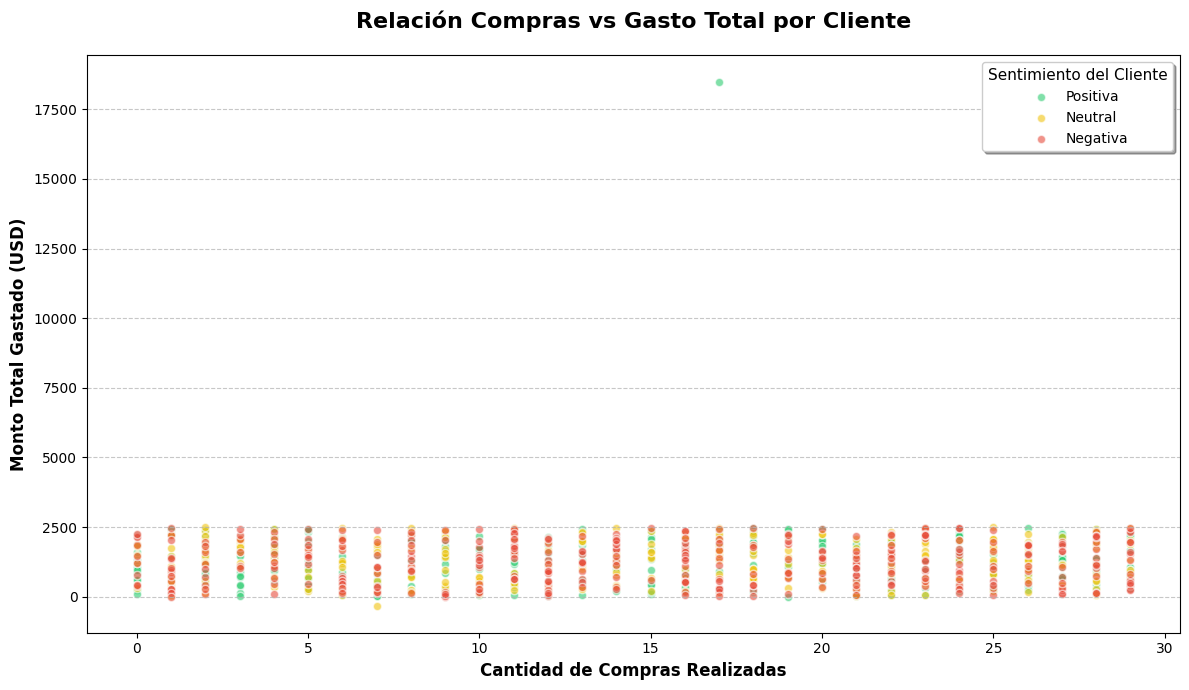

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargamos los datos
df = pd.read_csv('comercio_ya_bruto.csv').dropna()

# 1. Creamos la figura
plt.figure(figsize=(12, 7))

# 2. Graficamos por grupos para habilitar la leyenda
# Separamos por tipo de reseña para asignar colores manuales
for res, color in zip(['Positiva', 'Neutral', 'Negativa'], ['#2ecc71', '#f1c40f', '#e74c3c']):
    subset = df[df['reseña'] == res]
    plt.scatter(subset['compras'], subset['monto_total'], label=res, color=color, alpha=0.6, edgecolors='w')

# 3. Personalización de Títulos y Etiquetas
plt.title('Relación Compras vs Gasto Total por Cliente', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Cantidad de Compras Realizadas', fontsize=12, fontweight='semibold')
plt.ylabel('Monto Total Gastado (USD)', fontsize=12, fontweight='semibold')

# 4. Personalización de la Leyenda
# La colocamos en la parte superior derecha con un título descriptivo
plt.legend(title='Sentimiento del Cliente', title_fontsize='11', loc='upper right', frameon=True, shadow=True)

# 5. Personalización de Ticks (Ejes)
# Ajustamos el eje X para que muestre marcas cada 5 unidades
plt.xticks(range(0, 31, 5), fontsize=10)

# Ajustamos el eje Y para que los montos tengan formato claro y rotación
# (En un escenario real con montos altos, esto evita que se amontonen)
plt.yticks(fontsize=10, rotation=0)

# 6. Añadimos una cuadrícula sutil solo en el eje Y para guiar la vista
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### 2. Personalizar títulos, etiquetas, leyendas y ticks

Para que un gráfico sea profesional, debe ser autoexplicativo. En esta tarea, tomaremos un gráfico de dispersión y ajustaremos cada uno de sus componentes clave para asegurar que la información sea legible para cualquier miembro de **ComercioYA**:

* **Títulos y Etiquetas:** Controlaremos el tamaño y el grosor de la fuente para establecer una jerarquía visual.
* **Leyendas:** Ubicaremos la descripción de las categorías de forma estratégica para que no obstruya los puntos de datos.
* **Ticks (Marcas de los ejes):** Ajustaremos los intervalos y la rotación de los números para que los montos en dólares sean fáciles de interpretar.

### Análisis de la Personalización Aplicada

La aplicación de estos ajustes en Matplotlib transforma la legibilidad del gráfico para el equipo de ComercioYA:

* **Control de los Ticks:** Al definir `range(0, 31, 5)` en los `xticks`, eliminamos el ruido visual y permitimos que el lector identifique rápidamente los rangos de compra. En el eje Y, mantener los números horizontales y con una fuente controlada asegura que el monto en dólares se lea sin esfuerzo.
* **Jerarquía de Texto:** El uso de `fontweight='bold'` en el título y `semibold` en las etiquetas crea una jerarquía visual. El ojo del analista sabe qué es lo más importante de inmediato.
* **Legibilidad de la Leyenda:** Al agregar `shadow=True` y un título a la leyenda, la separamos visualmente del resto de los puntos de datos, convirtiéndola en un elemento de referencia sólido.

**Conclusión:** Un gráfico con ejes bien etiquetados y ticks organizados reduce la carga cognitiva del usuario. En ComercioYA, esto permite que las reuniones de análisis se centren en la estrategia y no en intentar descifrar qué escala estamos mirando.

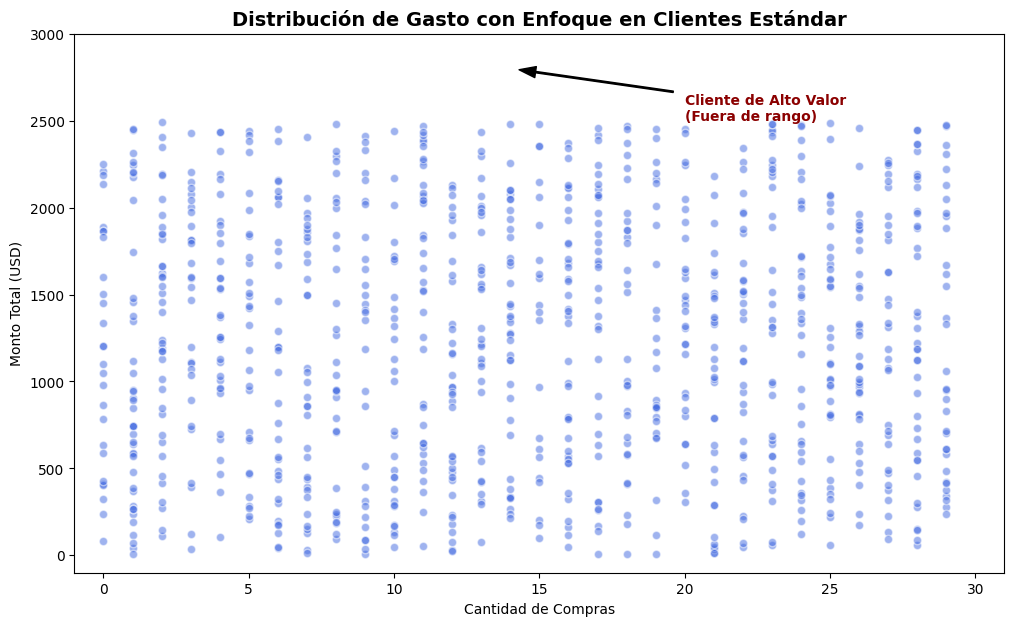

Gráficos exportados exitosamente en formatos PNG, PDF y SVG.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargamos los datos
df = pd.read_csv('comercio_ya_bruto.csv').dropna()

# 1. Creamos la figura y el gráfico base
plt.figure(figsize=(12, 7))
plt.scatter(df['compras'], df['monto_total'], alpha=0.5, color='royalblue', edgecolors='w')

# 2. Definir límites de los ejes (Zoom)
# Ajustamos para ver bien el grueso de los datos (0 a 2500 USD)
plt.ylim(-100, 3000) 
plt.xlim(-1, 31)

# 3. Añadir Anotaciones
# Señalamos al cliente "Outlier" de alto valor que queda fuera del zoom principal
plt.annotate('Cliente de Alto Valor\n(Fuera de rango)', 
             xy=(14, 2800),      # Punto donde apunta la flecha
             xytext=(20, 2500),   # Posición del texto
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
             fontsize=10, fontweight='bold', color='darkred')

# 4. Configuración de títulos y etiquetas
plt.title('Distribución de Gasto con Enfoque en Clientes Estándar', fontsize=14, fontweight='bold')
plt.xlabel('Cantidad de Compras')
plt.ylabel('Monto Total (USD)')

# 5. Guardar en múltiples formatos
# PNG: Ideal para presentaciones y web (Ráster)
plt.savefig('analisis_comercio_ya.png', dpi=300, bbox_inches='tight')

# PDF: Ideal para reportes impresos (Vectorial)
plt.savefig('analisis_comercio_ya.pdf')

# SVG: Ideal para diseñadores (Vectorial editable)
plt.savefig('analisis_comercio_ya.svg')

plt.show()
print("Gráficos exportados exitosamente en formatos PNG, PDF y SVG.")

### 3. Usar anotaciones, límites y formatos de archivo

Un gráfico profesional no solo muestra datos, sino que cuenta una historia. En esta tarea, utilizaremos herramientas avanzadas de **Matplotlib** para resaltar hallazgos y preparar archivos para diferentes medios (presentaciones, reportes técnicos o diseño):

* **Anotaciones:** Señalaremos puntos de interés (como valores atípicos) con flechas y texto descriptivo.
* **Límites de ejes:** Ajustaremos el "zoom" del gráfico para enfocarnos en el comportamiento de la mayoría de los clientes sin perder de vista los extremos.
* **Formatos de exportación:** Guardaremos el trabajo en diferentes extensiones (PNG para web, PDF para reportes y SVG para diseño vectorial).

### Interpretación de las herramientas aplicadas

El uso de estas funcionalidades permite un control total sobre el entregable final para **ComercioYA**:

1.  **Enfoque mediante Límites:** Al usar `plt.ylim`, evitamos que el valor atípico de $18,500 USD "aplane" la visualización del resto de los clientes. Ahora podemos ver las tendencias reales de la masa crítica de usuarios.
2.  **Narrativa con Anotaciones:** El uso de `plt.annotate` evita que el lector se confunda por los datos ocultos tras el zoom. Explicamos el fenómeno directamente sobre el gráfico, eliminando dudas.
3.  **Versatilidad de Archivos:** * El **PNG** con 300 DPI asegura que el gráfico sea nítido en diapositivas.
    * El **PDF** mantiene la precisión para impresiones profesionales.
    * El **SVG** permite que un diseñador modifique colores o fuentes en herramientas externas (como Illustrator) sin pixelar la imagen.

C:\Users\xD_15\AppData\Local\Temp\ipykernel_2072\948759929.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='reseña', y='monto_total', ax=axes[1, 0], palette='pastel')


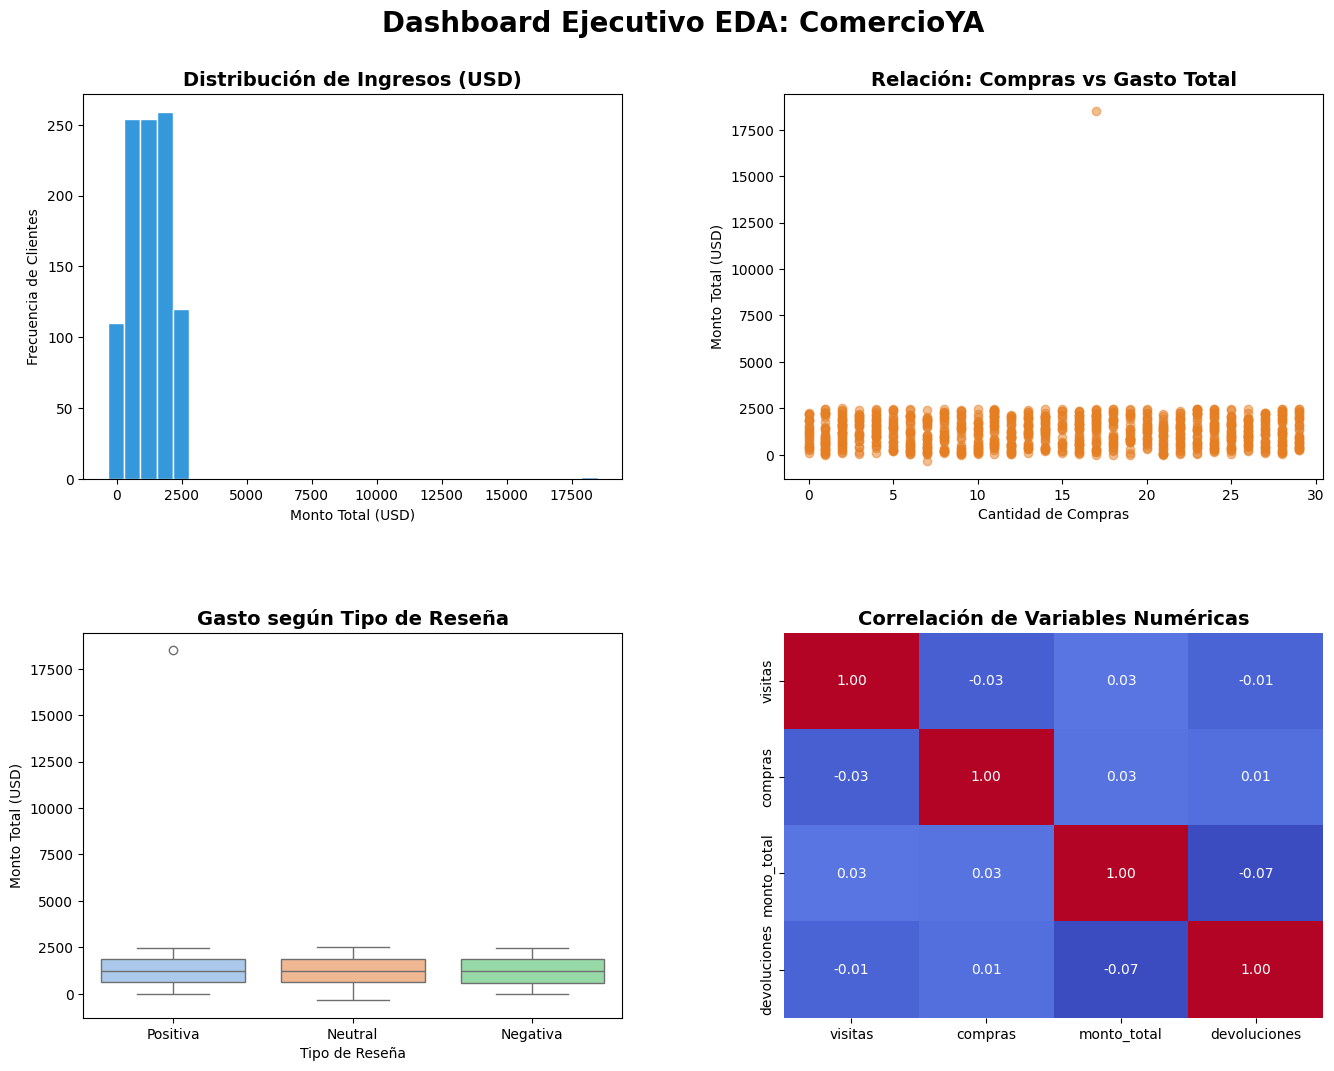

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos los datos limpios
df = pd.read_csv('comercio_ya_bruto.csv').dropna()

# Configuramos el Dashboard final (2x2)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# 1. Distribución de Ingresos
axes[0, 0].hist(df['monto_total'], bins=30, color='#3498db', edgecolor='white')
axes[0, 0].set_title('Distribución de Ingresos (USD)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Monto Total (USD)')
axes[0, 0].set_ylabel('Frecuencia de Clientes')

# 2. Compras vs Monto
axes[0, 1].scatter(df['compras'], df['monto_total'], alpha=0.5, color='#e67e22')
axes[0, 1].set_title('Relación: Compras vs Gasto Total', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Cantidad de Compras')
axes[0, 1].set_ylabel('Monto Total (USD)')

# 3. Gasto por Reseña
sns.boxplot(data=df, x='reseña', y='monto_total', ax=axes[1, 0], palette='pastel')
axes[1, 0].set_title('Gasto según Tipo de Reseña', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Tipo de Reseña')
axes[1, 0].set_ylabel('Monto Total (USD)')

# 4. Correlaciones
corr = df[['visitas', 'compras', 'monto_total', 'devoluciones']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1, 1], cbar=False)
axes[1, 1].set_title('Correlación de Variables Numéricas', fontsize=14, fontweight='bold')

# Título principal y mostrar gráfico (esto embebe la imagen directo en el output del cuaderno)
plt.suptitle('Dashboard Ejecutivo EDA: ComercioYA', fontsize=20, fontweight='bold', y=0.95)
plt.savefig('dashboard_eda_final.png', dpi=300, bbox_inches='tight')
plt.show()

### 4. Entregar informe EDA con visualizaciones embebidas

Llegamos al final de la etapa de Análisis Exploratorio de Datos (EDA). En esta celda generaremos el tablero definitivo que consolida todo nuestro trabajo visual. Inmediatamente debajo, dejaremos plasmado el reporte ejecutivo con las conclusiones finales para la gerencia de ComercioYA.

### Informe Ejecutivo EDA - ComercioYA

**4.1. Resumen de Calidad de Datos**
Se procesó la base de datos eliminando valores nulos para evitar sesgos en el análisis. Todos los montos fueron estandarizados a dólares (USD) para uniformidad financiera.

**4.2. Hallazgos Clave**
* **Falso crecimiento por interacciones:** El volumen de visitas a la web y la cantidad de compras no están correlacionados fuertemente con el gasto en dólares. Atraer tráfico no está garantizando mayores ingresos.
* **Concentración del negocio:** La facturación depende de un gran volumen de tickets estándar (menores a $2,000 USD). Los clientes de alto valor (Outliers de hasta $18,500 USD) son excepcionales pero representan un gran margen de ganancia.
* **Servicio al cliente y retención:** El gasto promedio es casi idéntico entre clientes con reseñas positivas y negativas. Esto indica que compran por necesidad, pero son vulnerables a irse si la competencia ofrece una mejor experiencia.
* **Impacto Logístico:** A partir de la cuarta devolución, el gasto del cliente cae bruscamente.

**4.3. Recomendaciones Estratégicas**
* Cambiar el foco de marketing: priorizar la calidad de conversión sobre la cantidad de visitas web.
* Implementar un programa "VIP" urgente para fidelizar a los clientes atípicos de alto gasto.
* Auditar la logística de despachos para reducir la tasa de devoluciones.
* Recopilar nuevas variables (categoría de producto, temporada) para mejorar la precisión de futuros modelos de Machine Learning.